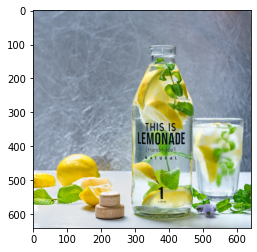

In [1]:
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import threshold_sauvola
import numpy as np
from skimage.exposure import is_low_contrast
from skimage.exposure import adjust_gamma
from skimage import exposure
from skimage.color import rgb2hsv
 
cimage = imread('../sample_images/image5.jpg')
plt.imshow(cimage)

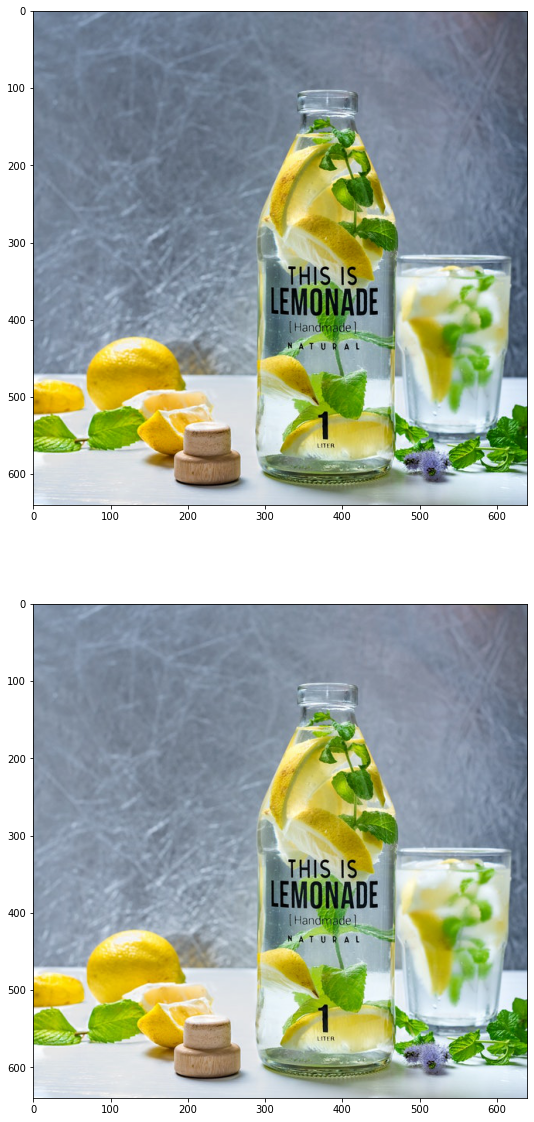

In [2]:
from skimage import exposure

gamma_corrected = exposure.adjust_gamma(cimage, 1.2)

fig, ax = plt.subplots(nrows=2, figsize=(20,20))
ax[0].imshow(gamma_corrected)
ax[1].imshow(cimage)

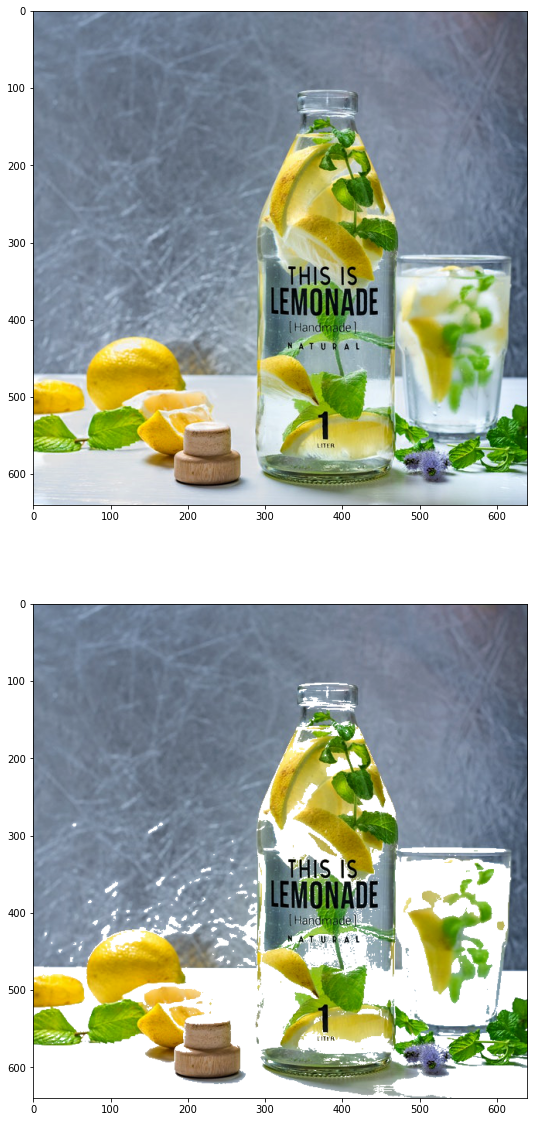

In [3]:
from skimage import color
from skimage.io import imsave

lab_img = color.rgb2lab(gamma_corrected)

copy_img = np.copy(gamma_corrected)
L_img = lab_img[:, :, 0]
A_img = lab_img[:, :, 1]
B_img = lab_img[:, :, 2]

x,y,z = lab_img.shape

for xi in range(x):
    for yi in range(y):
        if lab_img[xi,yi][0] > 70 and lab_img[xi,yi][1] > -40 and lab_img[xi,yi][1] < 40 and lab_img[xi,yi][2] > -40 and lab_img[xi,yi][2] < 40:
            copy_img[xi, yi] = [255,255,255]
        
fig, ax = plt.subplots(nrows=2, figsize=(20,20))
ax[0].imshow(gamma_corrected)
ax[1].imshow(copy_img)

Estimated Gaussian noise standard deviation = 0.4897654874154062


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


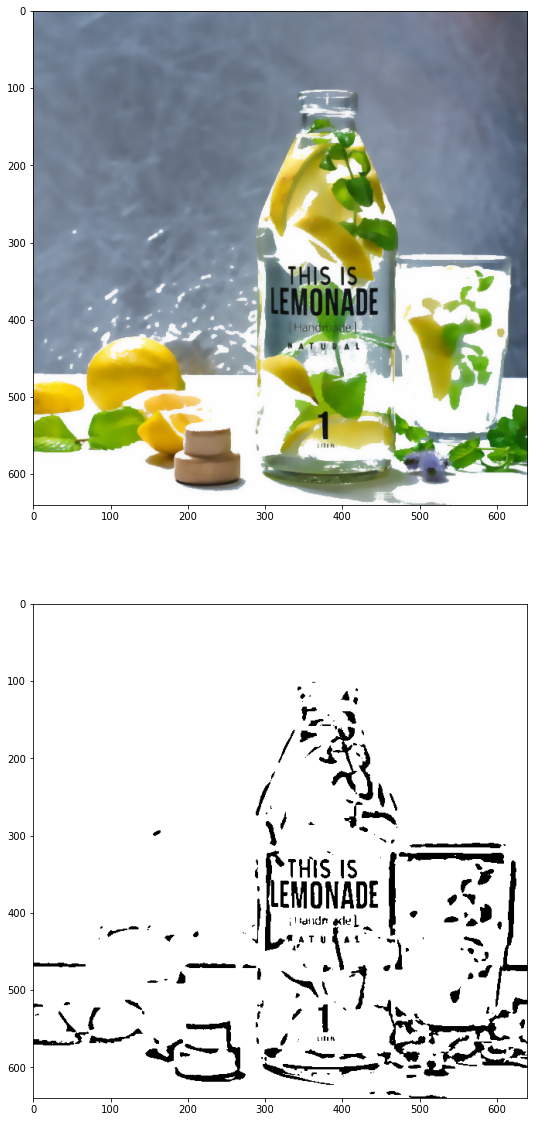

In [4]:
from skimage.filters import threshold_otsu
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

from skimage import img_as_float
# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(copy_img, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f"Estimated Gaussian noise standard deviation = {sigma_est}")

# if sigma_est > 1:
noise_removed = denoise_tv_chambolle(copy_img, multichannel=True)
# else:
#     noise_removed = copy_img
    
gry_img = color.rgb2gray(noise_removed)
th = threshold_sauvola(gry_img, 19)
bimg = gry_img > th

fig, ax = plt.subplots(nrows=2, figsize=(20,20))
ax[0].imshow(noise_removed)
ax[1].imshow(bimg,cmap="gray")
imsave('/tmp/time.jpg', img_as_float(bimg))

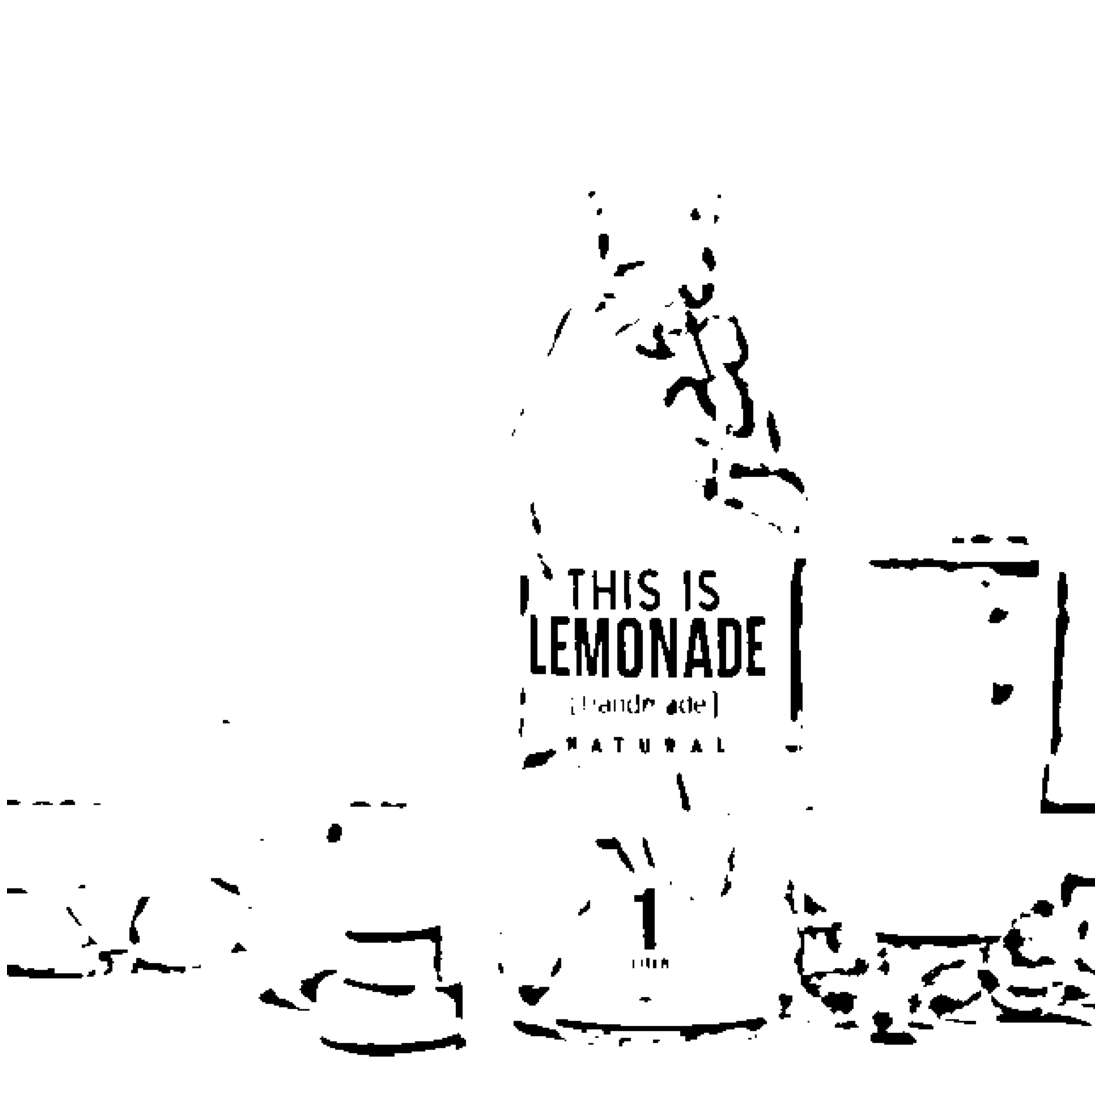

In [5]:
gamma_corrected = exposure.adjust_gamma(cimage, 1.2)
noise_removed = denoise_tv_chambolle(gamma_corrected, multichannel=True)
gry_img = color.rgb2gray(noise_removed)
th = threshold_sauvola(gry_img, 19)
bimg = gry_img > th

plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(bimg, cmap="gray")